In [1]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from data_wrangling import PickleHelper

# Face

In [ ]:
img_data = PickleHelper.load_pickle(path = "../../Data/Face/", name = "faces-features.pkl")

In [ ]:
print(len(np.shape(img_data)))
print(np.shape(np.reshape(img_data, (-1, np.shape(img_data)[1], np.shape(img_data)[2], 1))))

In [ ]:
img = img_data[0]
plt.imshow(img, cmap="gray")

print(np.max(img))

import cv2

img_norm = None
img_norm = cv2.normalize(img, dst=img_norm, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=-1)
'''
def scailing(img, new_min = 0, new_max = 255):
    old_max = np.max(img)
    old_min = np.min(img)

    print(old_max, old_min)
    return ((new_max - new_min) / (old_max - old_min)) * (img - old_min) + new_min
'''
img_norm = scailing(img, 0, 255)
print(np.min(img_norm), np.max(img_norm))
plt.imshow(img_norm, cmap="gray")

In [ ]:
img_shape = np.shape(img_data)
print(img_shape, len(img_shape))
assert len(img_shape) == 4, ("\nCUSTOM ERROR! ---> Input data shape isn't correct. The shape is {shape}".format(shape=img_shape))

In [ ]:
class net_setup(object):
    
    @classmethod
    def filter_variable(cls, in_depth, out_depth, node_name):
        return tf.Variable(
            tf.truncated_normal((3, 3, in_depth, out_depth), stddev=0.1, dtype=tf.float32),
            name=node_name+"-filter")
    
    def bias_variable(cls, size, node_name):
        return tf.Variable(
            tf.zeros([size], dtype=tf.float32), 
            name=node_name+"-bias")

    
class VGG16(net_setup):
    def __init__(self):
        self.__net_setting = None

    def input_node(self, in_data):
        img_shape = np.shape(in_data)
 
        if len(img_shape) < 4:
            in_data = np.reshape(in_data, (-1, np.shape(img_data)[1], np.shape(img_data)[2], 1))
            img_shape = np.shape(in_data)
 
        img_shape = (None, np.shape(in_data)[1], np.shape(in_data)[2], np.shape(in_data)[3])
    
        assert len(img_shape) == 4, ("\nCUSTOM ERROR! ---> Input data shape isn't correct. The shape is {shape}".format(shape=img_shape))
        
        return tf.placeholder(tf.float32, shape=img_shape)
    
    def convolutional_node(self, in_data, out_depth, name):
        with tf.variable_scope(name):
            conv_filter = self.filter_variable(in_depth=in_data.get_shape().as_list()[-1], out_depth=12, node_name=name)
            #print(conv_filter.shape)
            conv_bias = self.bias_variable(size=12, node_name=name)
            #print(conv_bias.shape)

            conv = tf.nn.conv2d(in_data, conv_filter, [1, 1, 1, 1], padding="SAME")
            conv = tf.nn.bias_add(conv, conv_bias)

            conv = tf.nn.relu(conv)

            return conv
        
    def architecture(self):
        conv1_1 = self.convolutional_node(1, 12)

conv1_kernel = 5
conv1_filter = 32
conv1_stride = 1
img_channel = 1

img_shape = (None, 28, 28, img_channel)
x = tf.placeholder(tf.float32, shape=img_shape)
print(x.shape)

conv1_W = tf.Variable(
    tf.truncated_normal(
        [conv1_kernel, conv1_kernel, img_channel, conv1_filter],
        stddev=0.1, dtype=tf.float32)) # 5x5 filter shape, 1->32 

print(conv1_W.shape)

    # CONV1 -> RELU1 -> MAXPOOL1                                                                                                                                                                                                                                             
conv1 = tf.nn.conv2d(x,
                     conv1_W,
                     strides=[conv1_stride, conv1_stride, conv1_stride, conv1_stride],
                     padding='SAME')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(conv1)

In [ ]:
vgg16 = VGG16()

a = vgg16.input_node(img_data)
print(type(a.get_shape().as_list()))

with tf.Session() as sess:
    conv1_1 = vgg16.convolutional_node(a, 12, "conv1_1")
    sess.run(tf.global_variables_initializer())

# Objects

In [ ]:
#img_data = unpickle("../../Data/Objects/cifar-100-python/train")
features = PickleHelper.load_pickle(path = "../../Data/Face/", name = "faces-features.pkl")
img_data = PickleHelper.load_pickle(path = "../../Data/Objects/cifar-100-python/", name = "train")[b'data']

In [ ]:
print(features.shape)
print(img_data.shape)

In [ ]:
sample = np.reshape(img_data, (-1, 3, 32, 32))
print(sample.shape)
sample = np.moveaxis(sample, 1, 3)
print(sample.shape)

In [ ]:
plt.imshow(features[0])

In [ ]:
plt.imshow(sample[20])

In [ ]:
np.shape(np.vstack([features, sample]))

In [ ]:
label1 = np.ones(len(features))
label2 = np.zeros(len(sample))
print(label1.shape, label2.shape)
np.shape(np.hstack([label1, label2]))

---

In [ ]:
arr = np.arange(9).reshape((3, 3))
print(arr)
np.random.shuffle(arr)
arr

# Check

In [2]:
features = PickleHelper.load_pickle(path = "../../Data/Face/", name = "faces-obj-features.pkl")
labels = PickleHelper.load_pickle(path = "../../Data/Face/", name = "faces-obj-labels.pkl")

../../Data/Face/
input_size:  275555496
	=> Load 'faces-obj-features.pkl' to '../../Data/Face/'
../../Data/Face/
input_size:  717753
	=> Load 'faces-obj-labels.pkl' to '../../Data/Face/'


In [3]:
features[25]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   1,   1]],

       ...,

       [[137, 138, 124],
        [142, 140, 127],
        [129, 126, 117],
        ...,
        [129, 127, 120],
        [128, 125, 118],
        [127, 125, 120]],

       [[130, 130, 116],
        [136, 134, 121],
        [122, 119, 110],
        ...,
        [125, 121, 110],
        [121, 118, 109],
        [104, 103,  98]],

       [[121, 119, 106],
        [129, 127, 114],
        [120, 117, 110],
        ...,
        [123, 117, 105],
        [116, 112, 104],
        [102, 103,  97]]

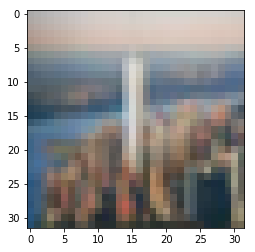

In [11]:
plt.imshow(features[5], cmap='gray')